In [ ]:
!pip install kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

In [2]:
df = pd.read_csv('insurance.zip', compression='zip')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.isna().sum().sort_values()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df.drop_duplicates(inplace=True)

Our dataset looks good and we can now start some exploratory data analysis on it to try and understand it.

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


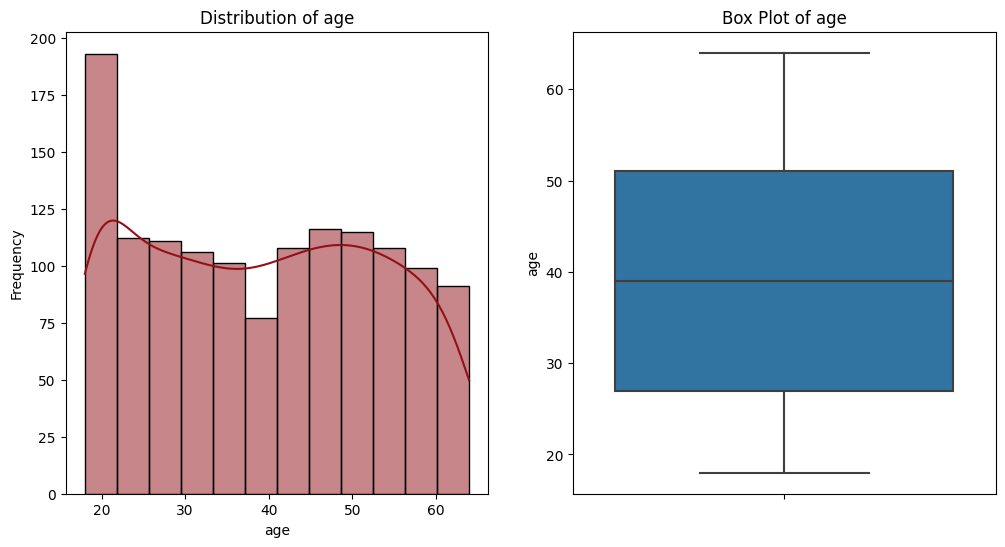

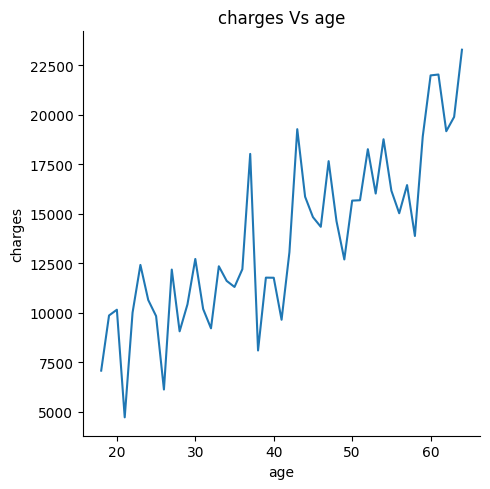

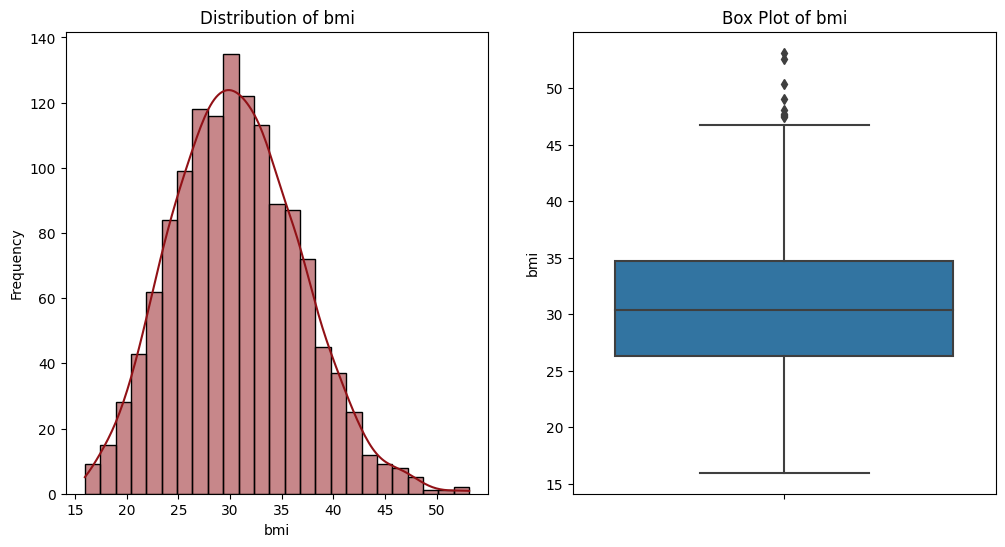

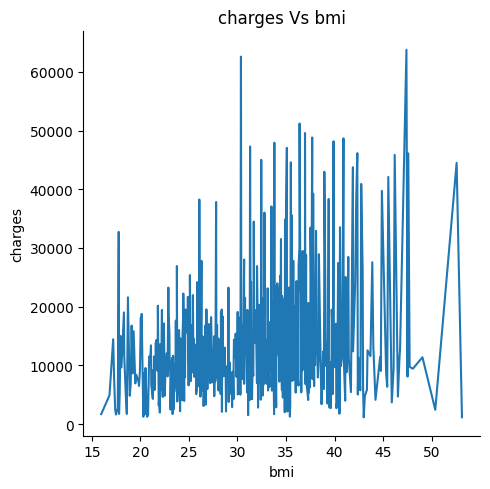

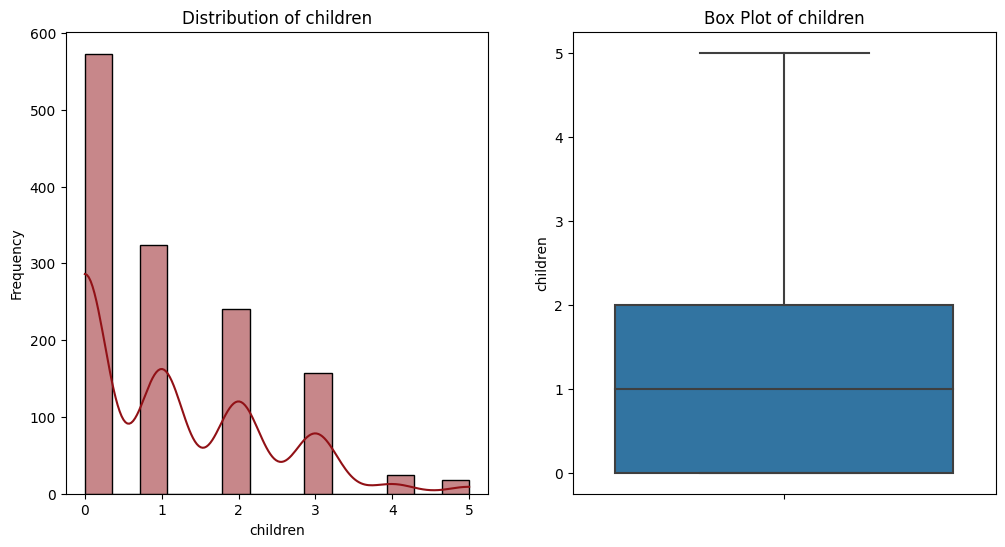

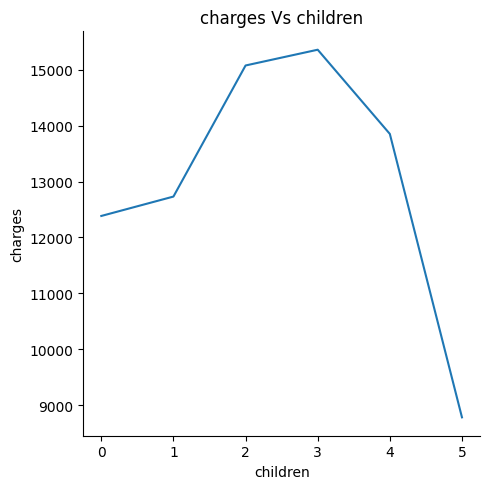

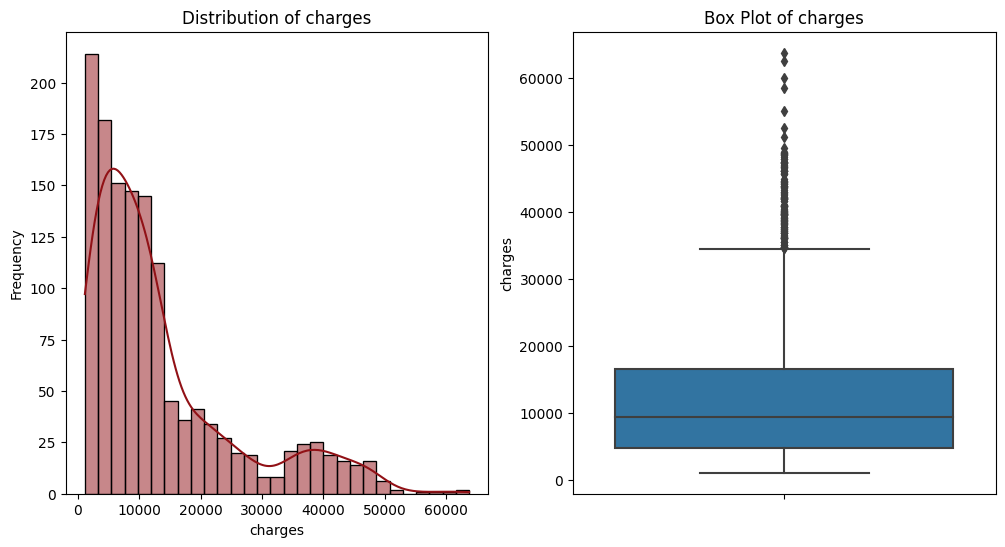

In [11]:
for column in df.columns:    
    if df[column].dtype != 'category':
        plt.figure(figsize=(12, 6))
        # Defining subplots in one row and two columns
        # In index one of the subplot, we will have histogram
        plt.subplot(1,2,1)
        sns.histplot(data=df, x=column, kde=True, color = '#911116', line_kws={'color': '#911156'})
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        # The second index subplot will have boxplots
        plt.subplot(1,2,2)
        sns.boxplot(data=df, y=column)
        plt.ylabel(column)
        plt.title(f'Box Plot of {column}')
        # The third subplot will show the relationship between the column and charges
        if column == 'charges':
            continue
        sns.relplot(data=df, x=column, y='charges', kind = 'line', ci = None)
        plt.ylabel('charges')
        plt.title(f'charges Vs {column}')
        # To make sure that no overlapping 
        plt.tight_layout()
        plt.show()

The above plots are very insightful. 

1. Lets start by age. Studying the histogram we see that young adults of age 20 are the most. And then the frequency declines upto age 40 were it then starts to raise again upto around 50 years and then it starts to decline again. This cycle could be replicating the life cycle, where most people start taking good care of their health after age 20 probably because they are now grown ups and they moved out of their parents house. We see the number of health issues decline upto age 40 where now health issues start kicking in due to the life style that people have had and also the fact that a person is growing old. We see the number of patients increase upto around 50 years were it start declining again, this might be due to the fact that is the age were most chronical diseases come in hard. Let's take care of our health!

   From the box plot, we see that the median age is around 39-40 years.

   From the line plot between charges and age, we see that medical charges increase with age, makes sense.

2. BMI, a search from google: 

   Underweight: BMI less than 18.5

   Normal weight: BMI from 18.5 to 24.9

   Overweight: BMI from 25 to 29.9

   Obesity: BMI 30 or higher

   From the histogram we can see majory of people are of BMI around 30. However we also see a lot of them above 30! From the line plot of BMI and charges, we see that the highest charges are from records will BMI above 30.

3. About children, most of them do not have children. The average number of children is one. The line plot is not that insightful since it tells that charges tend to decline after the third child, but I think it is beacuse the number of people with more tha    three children is small hence such a trend.

4. The distribution of charges shows that most people pay for charges less than 10000.



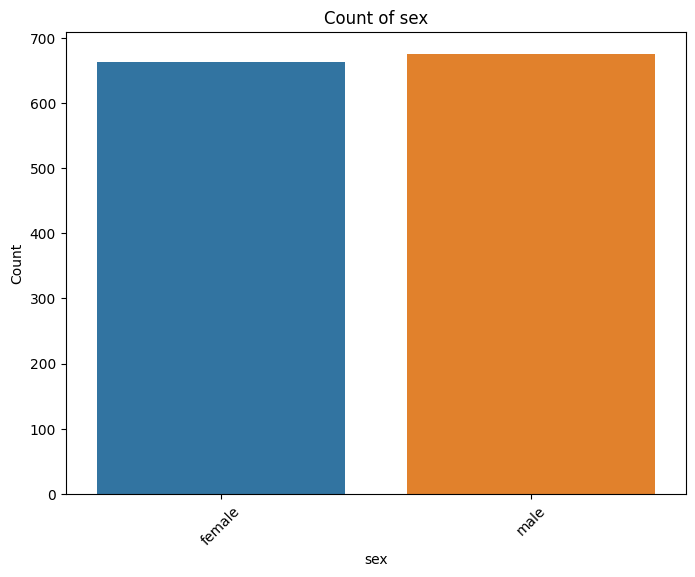

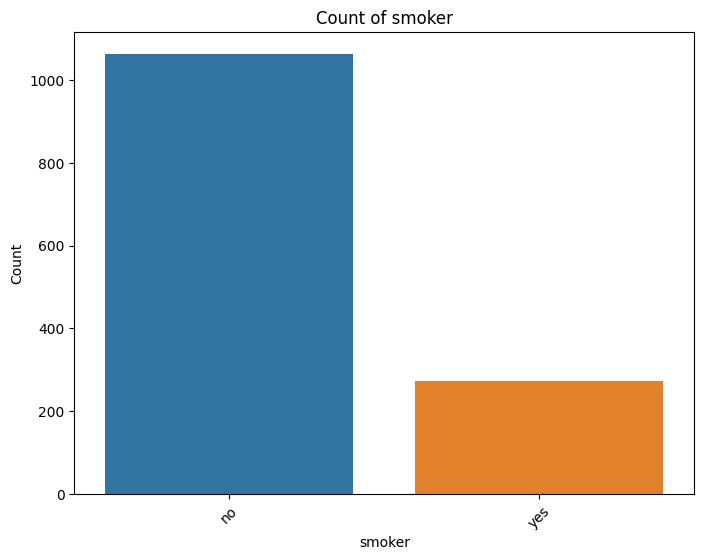

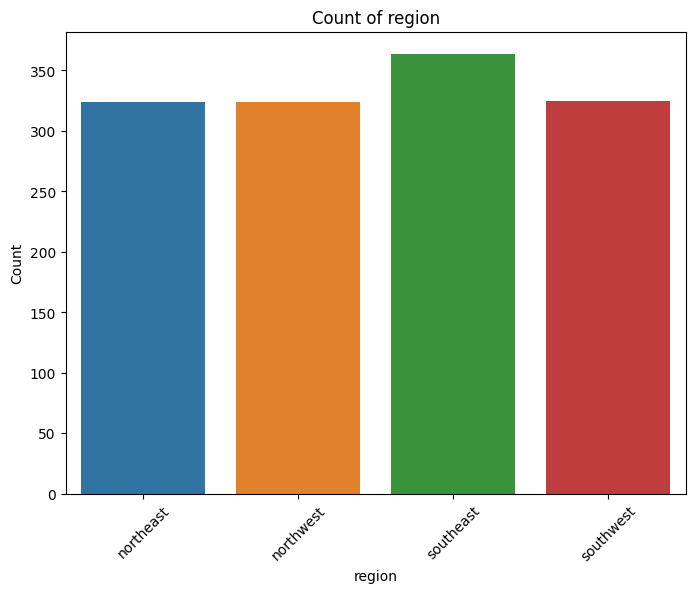

In [12]:
for column in df.columns:    
    if df[column].dtype == 'category':
        plt.figure(figsize=(8, 6))
        # Make a count plot with seaborn
        sns.countplot(data=df, x=column)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Count of {column}')
        plt.xticks(rotation = 45)
        plt.show()

The number for male is slighly higher than that of female. We also see a large number of non-smokers and southeast region had the most occurences.

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

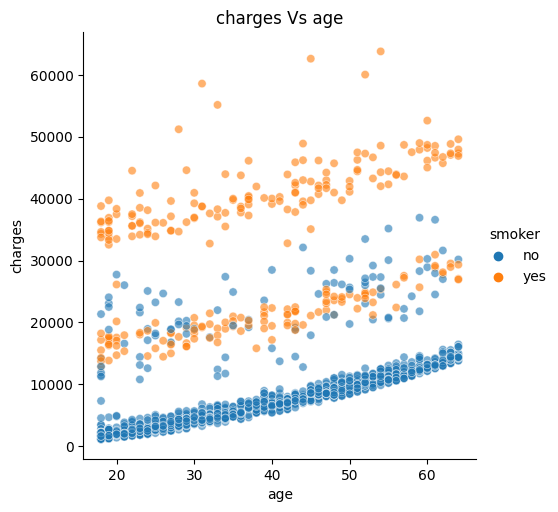

In [14]:

sns.relplot(data=df, x='age', y='charges', kind='scatter', hue='smoker', alpha=0.6)
plt.ylabel('charges')
plt.title('charges Vs age')
plt.show()

We can see that generaly helth expenses increase with age, but the expenses are high for smokers.

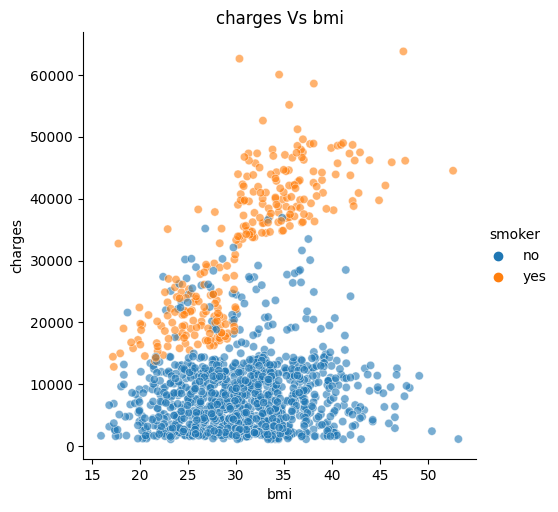

In [16]:
sns.relplot(data=df, x='bmi', y='charges', kind='scatter', hue='smoker', alpha=0.6)
plt.ylabel('charges')
plt.title('charges Vs bmi')
plt.show()

For non-smokers we don't see quite a trend but lets pay attention to the smoker. Generally health expenses for smokers are high and higher for smokers with BMI above 30!

With those insights we can now fit a predictive model.


In [17]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

We will have to convert the category columns to dummy variables.

In [18]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


Text(0.5, 1.0, 'Correlation Analysis')

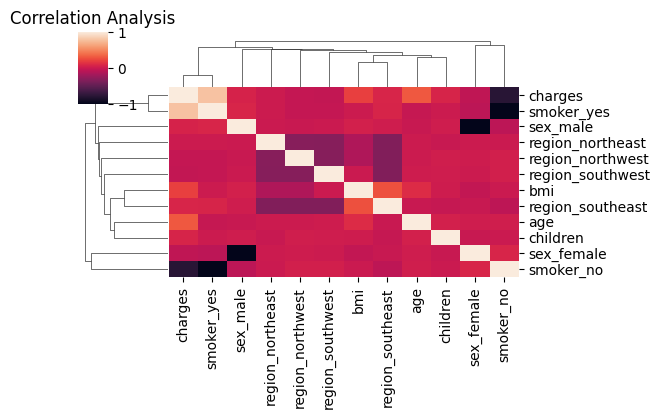

In [19]:
sns.clustermap(df_dummies.corr(method='pearson'), figsize=(6,4))
plt.title('Correlation Analysis')

In [20]:
df_dummies.corr()['charges'].sort_values()

smoker_no          -0.787234
sex_female         -0.058044
region_southwest   -0.043637
region_northwest   -0.038695
region_northeast    0.005945
sex_male            0.058044
children            0.067389
region_southeast    0.073578
bmi                 0.198401
age                 0.298308
smoker_yes          0.787234
charges             1.000000
Name: charges, dtype: float64

Remember to avoid duplicating information we will drop one dummy variable category.

In [22]:
df_dummies = pd.get_dummies(df, drop_first = True)
df_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


So our reference categories are female and non-smoker for sex and smoker respectively.

In [23]:
df_dummies.dtypes


age                   int64
bmi                 float64
children              int64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

Here we will try to fit three regression models and choose the best,<mark> Linear regression, Ridge, and Lasso <mark>. 

However this data is not large and trying with a simple linear regression is working better.

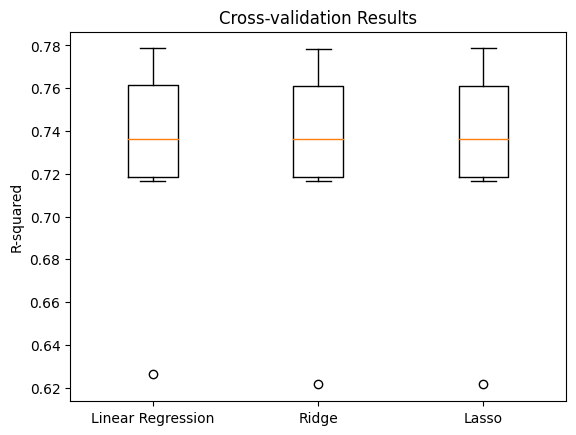

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate the dummy variables and numeric features
numeric_features = ['age', 'bmi', 'children']  # List of numeric feature column names
dummy_features = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']  # List of dummy variable column names 

# Split the data into training and test sets
X = df_dummies[numeric_features + dummy_features]
y = df_dummies['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1)
}

# Define transformers for numeric features and dummy features
numeric_transformer = StandardScaler()
dummy_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer to apply the transformers separately to numeric and dummy features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', dummy_transformer, dummy_features)
    ])

# Create a list to store the results
results = []

# Loop through the models
for model_name, model in models.items():
    # Create a pipeline that includes the preprocessor and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    kf = KFold(n_splits=6, random_state=24, shuffle=True)
  
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf)
  
    # Append the results
    results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.ylabel('R-squared')
plt.title('Cross-validation Results')
plt.show()


From our box plots it seems like the three models are equally good for this task.

Lets observe their mean errors

A simple linear regression is also working well